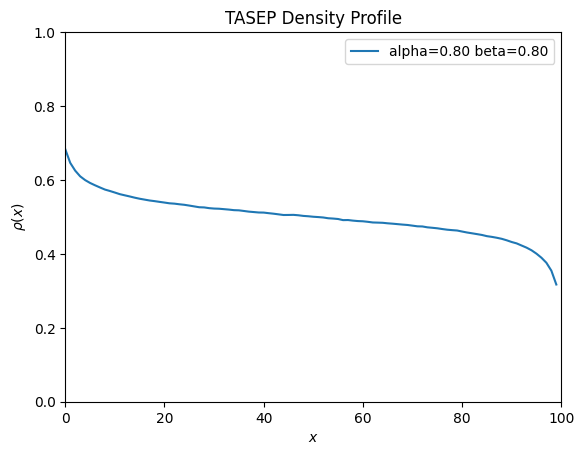

In [1]:
# TASEP (Totally Asymmetric Simple Exclusion Process) Simulation
# High-Density Phase

import matplotlib.pyplot as plt
import numpy as np

def step(state, alpha, beta):
    """
    Perform one step of the TASEP simulation.

    Args:
        state (np.array): Current state of the lattice.
        alpha (float): Entry rate at the left boundary.
        beta (float): Exit rate at the right boundary.

    Returns:
        np.array: Updated state of the lattice.
    """
    L = len(state)
    x = np.random.choice(L)  # Randomly select a site

    if x == 0:  # Left boundary
        if state[x] == 0 and np.random.random() <= alpha:
            state[x] = 1  # Particle enters
        elif state[x] == 1 and state[x + 1] == 0:
            state[x] = 0  # Particle moves right
            state[x + 1] = 1
    elif x == L - 1:  # Right boundary
        if np.random.random() <= beta:
            state[L - 1] = 0  # Particle exits
    else:  # Bulk
        if state[x] == 1 and state[x + 1] == 0:
            state[x] = 0  # Particle moves right
            state[x + 1] = 1
    return state

def run_simulation(L, alpha, beta, Nmax, Ninit):
    """
    Run the TASEP simulation.

    Args:
        L (int): Length of the lattice.
        alpha (float): Entry rate at the left boundary.
        beta (float): Exit rate at the right boundary.
        Nmax (int): Total number of steps.
        Ninit (int): Number of steps to skip before measuring.

    Returns:
        np.array: Average density profile.
    """
    state = np.zeros(L, dtype=int)  # Initialize lattice
    rho = np.zeros(L)  # Density profile
    rhocnt = 0  # Counter for averaging

    for n in range(Nmax):
        state = step(state, alpha, beta)
        if n > Ninit:  # Start measuring after Ninit steps
            rho += state
            rhocnt += 1
    return rho / rhocnt  # Return average density

# Parameters
L = 100  # Lattice size
Nmax = 2000000 * L  # Total steps
Ninit = 100000 * L  # Initial steps to skip
alpha1 = 0.8  # Entry rate
beta1 = 0.8  # Exit rate

# Run simulation
rho1 = run_simulation(L, alpha1, beta1, Nmax, Ninit)

# Plot results
plt.figure()
plt.plot(range(L), rho1, label=f'alpha={alpha1:.2f} beta={beta1:.2f}')
plt.ylim((0, 1))
plt.xlim(0, L)
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.title('TASEP Density Profile')
plt.show()